# 범주 3주차 Py 실습


## 분류 평가지표 

Kaggle의 그 유명한 타이타닉 데이터를 통해 3주차에 배운 분류 평가지표들을 실습해봅시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings  
warnings.filterwarnings(action="ignore")

skearn.metrics 모듈을 통해 분류 평가지표들을 사용할 수 있음.

In [3]:
# 전처리 함수 생성
def get_category(age):
    cat=""
    if age <= -1: cat="Unknown"
    elif age <= 5: cat="Baby"
    elif age <= 12: cat="Child"
    elif age <= 18: cat="Teenager"
    elif age <= 25: cat="Student"
    elif age <=35: cat="Young Adult"
    elif age <= 60: cat="Adult"
    else: cat="Elderly"
    return cat

def feature_tf(df):
    enc_feature = ["Sex", "AgeGroup"]
    drop_feature = ["Name", "Embarked", "Ticket", "Cabin", "Age"]
    df["AgeGroup"]=df["Age"].apply(lambda x : get_category(x))
    df.drop(columns = drop_feature,inplace=True)
    for feature in enc_feature:
        enc = LabelEncoder()
        df[feature] = enc.fit_transform(df[feature])
    return df

# 평가지표 계산 함수 생성
def show_metrics(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion)
    print("Acc : {}".format(accuracy))
    print("precision : {}".format(precision))
    print("recall : {}".format(recall))

In [4]:
# 데이터 불러오기
df = pd.read_csv("train.csv")
X = df.iloc[:, df.columns != "Survived"]
y = df.iloc[:, df.columns == "Survived"]
feature_tf(X)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# train test 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 로지스틱 회귀 모델 적합
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_metrics(y_test, y_pred)

[[99 13]
 [19 48]]
Acc : 0.8212290502793296
precision : 0.7868852459016393
recall : 0.7164179104477612


In [6]:
# ROC curve 시각화 
prob_positive_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_positive_pred)

print("FPR : {}".format(fpr[:4]))
print("TPR : {}".format(tpr[:4]))
print("threshold(cut-off point) : {}".format(thresholds[:4]))

FPR : [0.         0.         0.         0.00892857]
TPR : [0.         0.01492537 0.2238806  0.2238806 ]
threshold(cut-off point) : [1.99499933 0.99499933 0.81933505 0.81225031]


<AxesSubplot:xlabel='fpr', ylabel='tpr'>

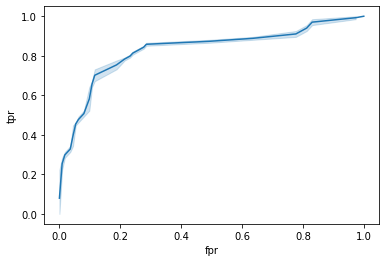

In [7]:
df = {"threshold":thresholds, "fpr":fpr, "tpr":tpr}
df = pd.DataFrame.from_dict(df)
sns.lineplot(x="fpr", y="tpr", data=df)

In [8]:
# ROC 곡선의 AUC
roc_score = roc_auc_score(y_test, prob_positive_pred) 
print(roc_score)

0.8318230277185501


## Sampling

클래스 불균형 문제를 해결하기 위한 sampling 실습! imblearn 모듈을 통해서 쉽게 샘플링한 데이터를 만들 수 있다.

In [9]:
from imblearn.under_sampling import * 
from imblearn.over_sampling import *
from imblearn.combine import * # 복합 샘플링

In [10]:
# 데이터 불러오기 
data = pd.read_csv("data.csv")
y = data.cls
X = data

### Random UnderSampling

In [11]:
new = RandomUnderSampler(random_state = 0).fit_resample(X, y) # random_state는 R에서의 seed와 같음!
new = pd.DataFrame(new[0]) 
new.to_csv("Sampling/RandomUnderSampling.csv", header = False, index = False)

### Random OverSampling

In [12]:
new = RandomOverSampler(random_state = 0).fit_resample(X, y)
new = pd.DataFrame(new[0])
new.to_csv("Sampling/RandomOverSampling.csv", header = False, index = False)

### SMOTE

In [13]:
new = SMOTE(random_state = 0).fit_resample(X, y)
new = pd.DataFrame(new[0])
new.to_csv("Sampling/SMOTE.csv", header = False, index = False)